In [1]:
import pandas as pd
import numpy as np
import sys
import os
sys.path.append(os.path.abspath('../modules'))
from statistical_methods import StatisticalMethods
from best_pipelines import models_to_cv
import matplotlib.colors as mcolors
import seaborn as sns
import math
import matplotlib.pyplot as plt
from results_visualization import plot_metric_boxplots, plot_time_vs_performance_scatter

# Sem ADASYN

In [3]:
best_pipelines, ensembles = models_to_cv()

metrics = {}
for model in best_pipelines.keys():
    metrics[model] = pd.read_csv(f'../metrics/metrics_{model}_cv.csv')

for model in ensembles.keys():
    metrics[model] = pd.read_csv(f'../metrics/metrics_{model}_cv.csv')

In [4]:
list_of_model_results = [metrics[model] for model in metrics.keys()]
list_of_model_names = list(metrics.keys())
list_of_metrics_names = ['train_accuracy', 'test_accuracy', 'ACSA', 'recall', 'f1_score', 'training_time', 'inference_time']

comp = StatisticalMethods(list_of_model_results, list_of_model_names, list_of_metrics_names)

friedman_results, metrics_with_difference = comp.friedman_test()

nemenyi_results = comp.nemenyi_test(metrics_with_difference)

In [5]:
comp.get_estimate_and_ci()

,model,metric,mean,std,ci
0,KNN,train_accuracy,0.990190,0.000733,"0.9897, 0.9906"
1,KNN,test_accuracy,0.963334,0.005007,"0.9602, 0.9664"
2,KNN,ACSA,0.962301,0.005026,"0.9592, 0.9654"
3,KNN,recall,0.972244,0.006639,"0.9681, 0.9764"
4,KNN,f1_score,0.966959,0.004539,"0.9641, 0.9698"
...,...,...,...,...,...
65,ANNs,ACSA,0.969330,0.005075,"0.9662, 0.9725"
66,ANNs,recall,0.976616,0.008417,"0.9714, 0.9818"
67,ANNs,f1_score,0.973001,0.004445,"0.9702, 0.9758"
68,ANNs,training_time,91.144984,9.627399,"85.1779, 97.1121"


In [6]:
estimates_and_cis = comp.get_formatted_estimate_and_ci()
estimates_and_cis

,Modelo,Métrica,Média,Desvio,IC
0,KNN,Acurácia de treino,99.02,0.07,"[98.97 , 99.06]"
1,KNN,Acurácia de teste,96.33,0.50,"[96.02 , 96.64]"
2,KNN,ACSA,96.23,0.50,"[95.92 , 96.54]"
3,KNN,Recall,97.22,0.66,"[96.81 , 97.64]"
4,KNN,F1-score,96.70,0.45,"[96.41 , 96.98]"
...,...,...,...,...,...
65,ANNs,ACSA,96.93,0.51,"[96.62 , 97.25]"
66,ANNs,Recall,97.66,0.84,"[97.14 , 98.18]"
67,ANNs,F1-score,97.30,0.44,"[97.02 , 97.58]"
68,ANNs,Tempo de treinamento,91.10,9.60,"[8517.79 , 9711.21]"


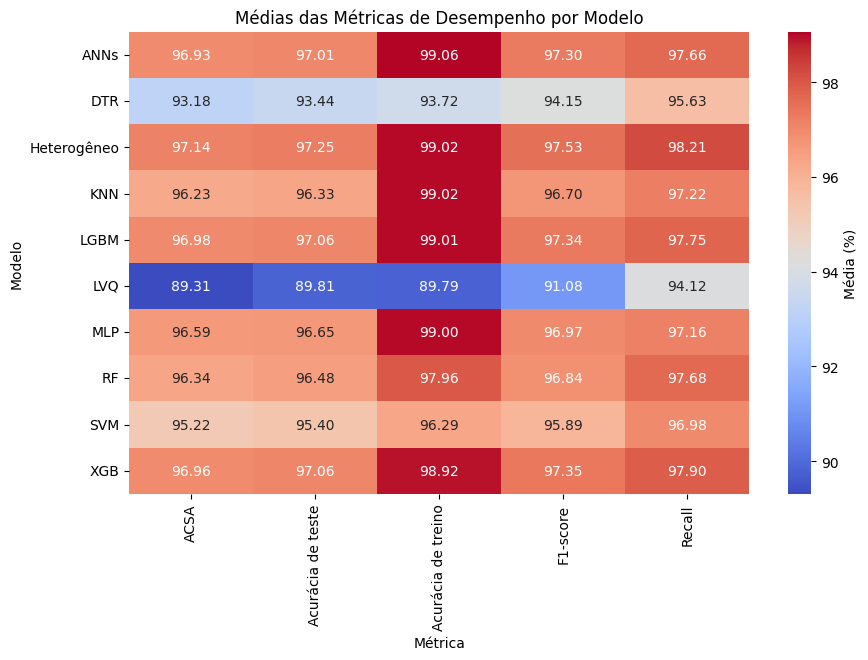

In [7]:
filtered_data = estimates_and_cis[estimates_and_cis['Métrica'].isin(['ACSA', 'Recall', 'F1-score', 'Acurácia de treino', 'Acurácia de teste'])]
heatmap_data = filtered_data.pivot(index="Modelo", columns="Métrica", values="Média")

plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, fmt=".2f", cmap="coolwarm", cbar_kws={'label': 'Média (%)'})
plt.title("Médias das Métricas de Desempenho por Modelo")
plt.xlabel("Métrica")
plt.ylabel("Modelo")
plt.show()

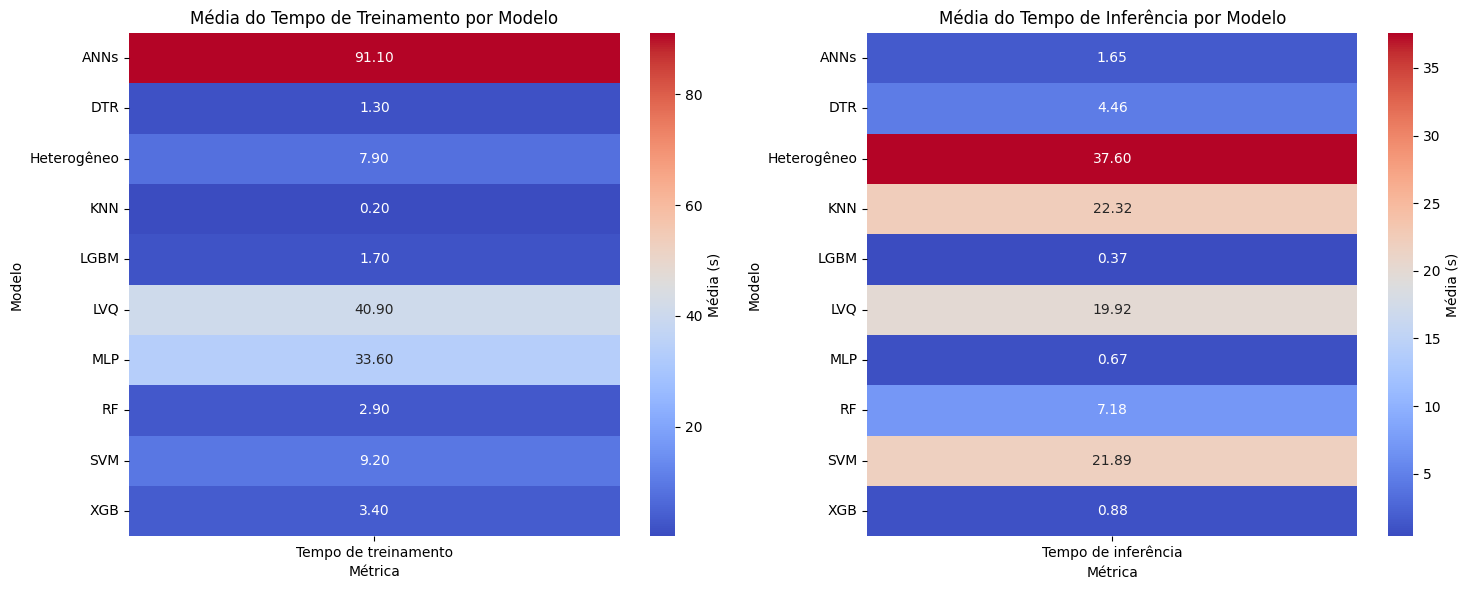

In [8]:
filtered_training_time = estimates_and_cis[estimates_and_cis['Métrica'] == 'Tempo de treinamento']
heatmap_training_time = filtered_training_time.pivot(index="Modelo", columns="Métrica", values="Média")

filtered_inference_time = estimates_and_cis[estimates_and_cis['Métrica'] == 'Tempo de inferência']
heatmap_inference_time = filtered_inference_time.pivot(index="Modelo", columns="Métrica", values="Média")

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

sns.heatmap(heatmap_training_time, annot=True, fmt=".2f", cmap="coolwarm", cbar_kws={'label': 'Média (s)'}, ax=axes[0])
axes[0].set_title("Média do Tempo de Treinamento por Modelo")
axes[0].set_xlabel("Métrica")
axes[0].set_ylabel("Modelo")

sns.heatmap(heatmap_inference_time, annot=True, fmt=".2f", cmap="coolwarm", cbar_kws={'label': 'Média (s)'}, ax=axes[1])
axes[1].set_title("Média do Tempo de Inferência por Modelo")
axes[1].set_xlabel("Métrica")
axes[1].set_ylabel("Modelo")

plt.tight_layout()
plt.show()

In [9]:
friedman_results

,metric,statistic,p-value,are_different
0,train_accuracy,79.733861,1.825300e-13,True
1,test_accuracy,73.815403,2.706738e-12,True
2,ACSA,75.047330,1.546656e-12,True
3,recall,57.837905,3.491531e-09,True
4,f1_score,72.786408,4.316741e-12,True
5,training_time,88.930909,2.667339e-15,True
6,inference_time,84.798666,1.789704e-14,True


In [10]:
nemenyi_results

,metric,classifier_pair,p-value,are_different
0,train_accuracy,KNN vs LVQ,2.724241e-05,True
1,train_accuracy,KNN vs DTR,9.055827e-04,True
2,train_accuracy,KNN vs SVM,1.634887e-02,True
3,train_accuracy,KNN vs RF,1.468623e-01,False
4,train_accuracy,KNN vs XGB,7.053513e-01,False
...,...,...,...,...
310,inference_time,LGBM vs Heterogêneo,4.973169e-08,True
311,inference_time,LGBM vs ANNs,8.544355e-01,False
312,inference_time,MLP vs Heterogêneo,5.789859e-07,True
313,inference_time,MLP vs ANNs,9.752367e-01,False


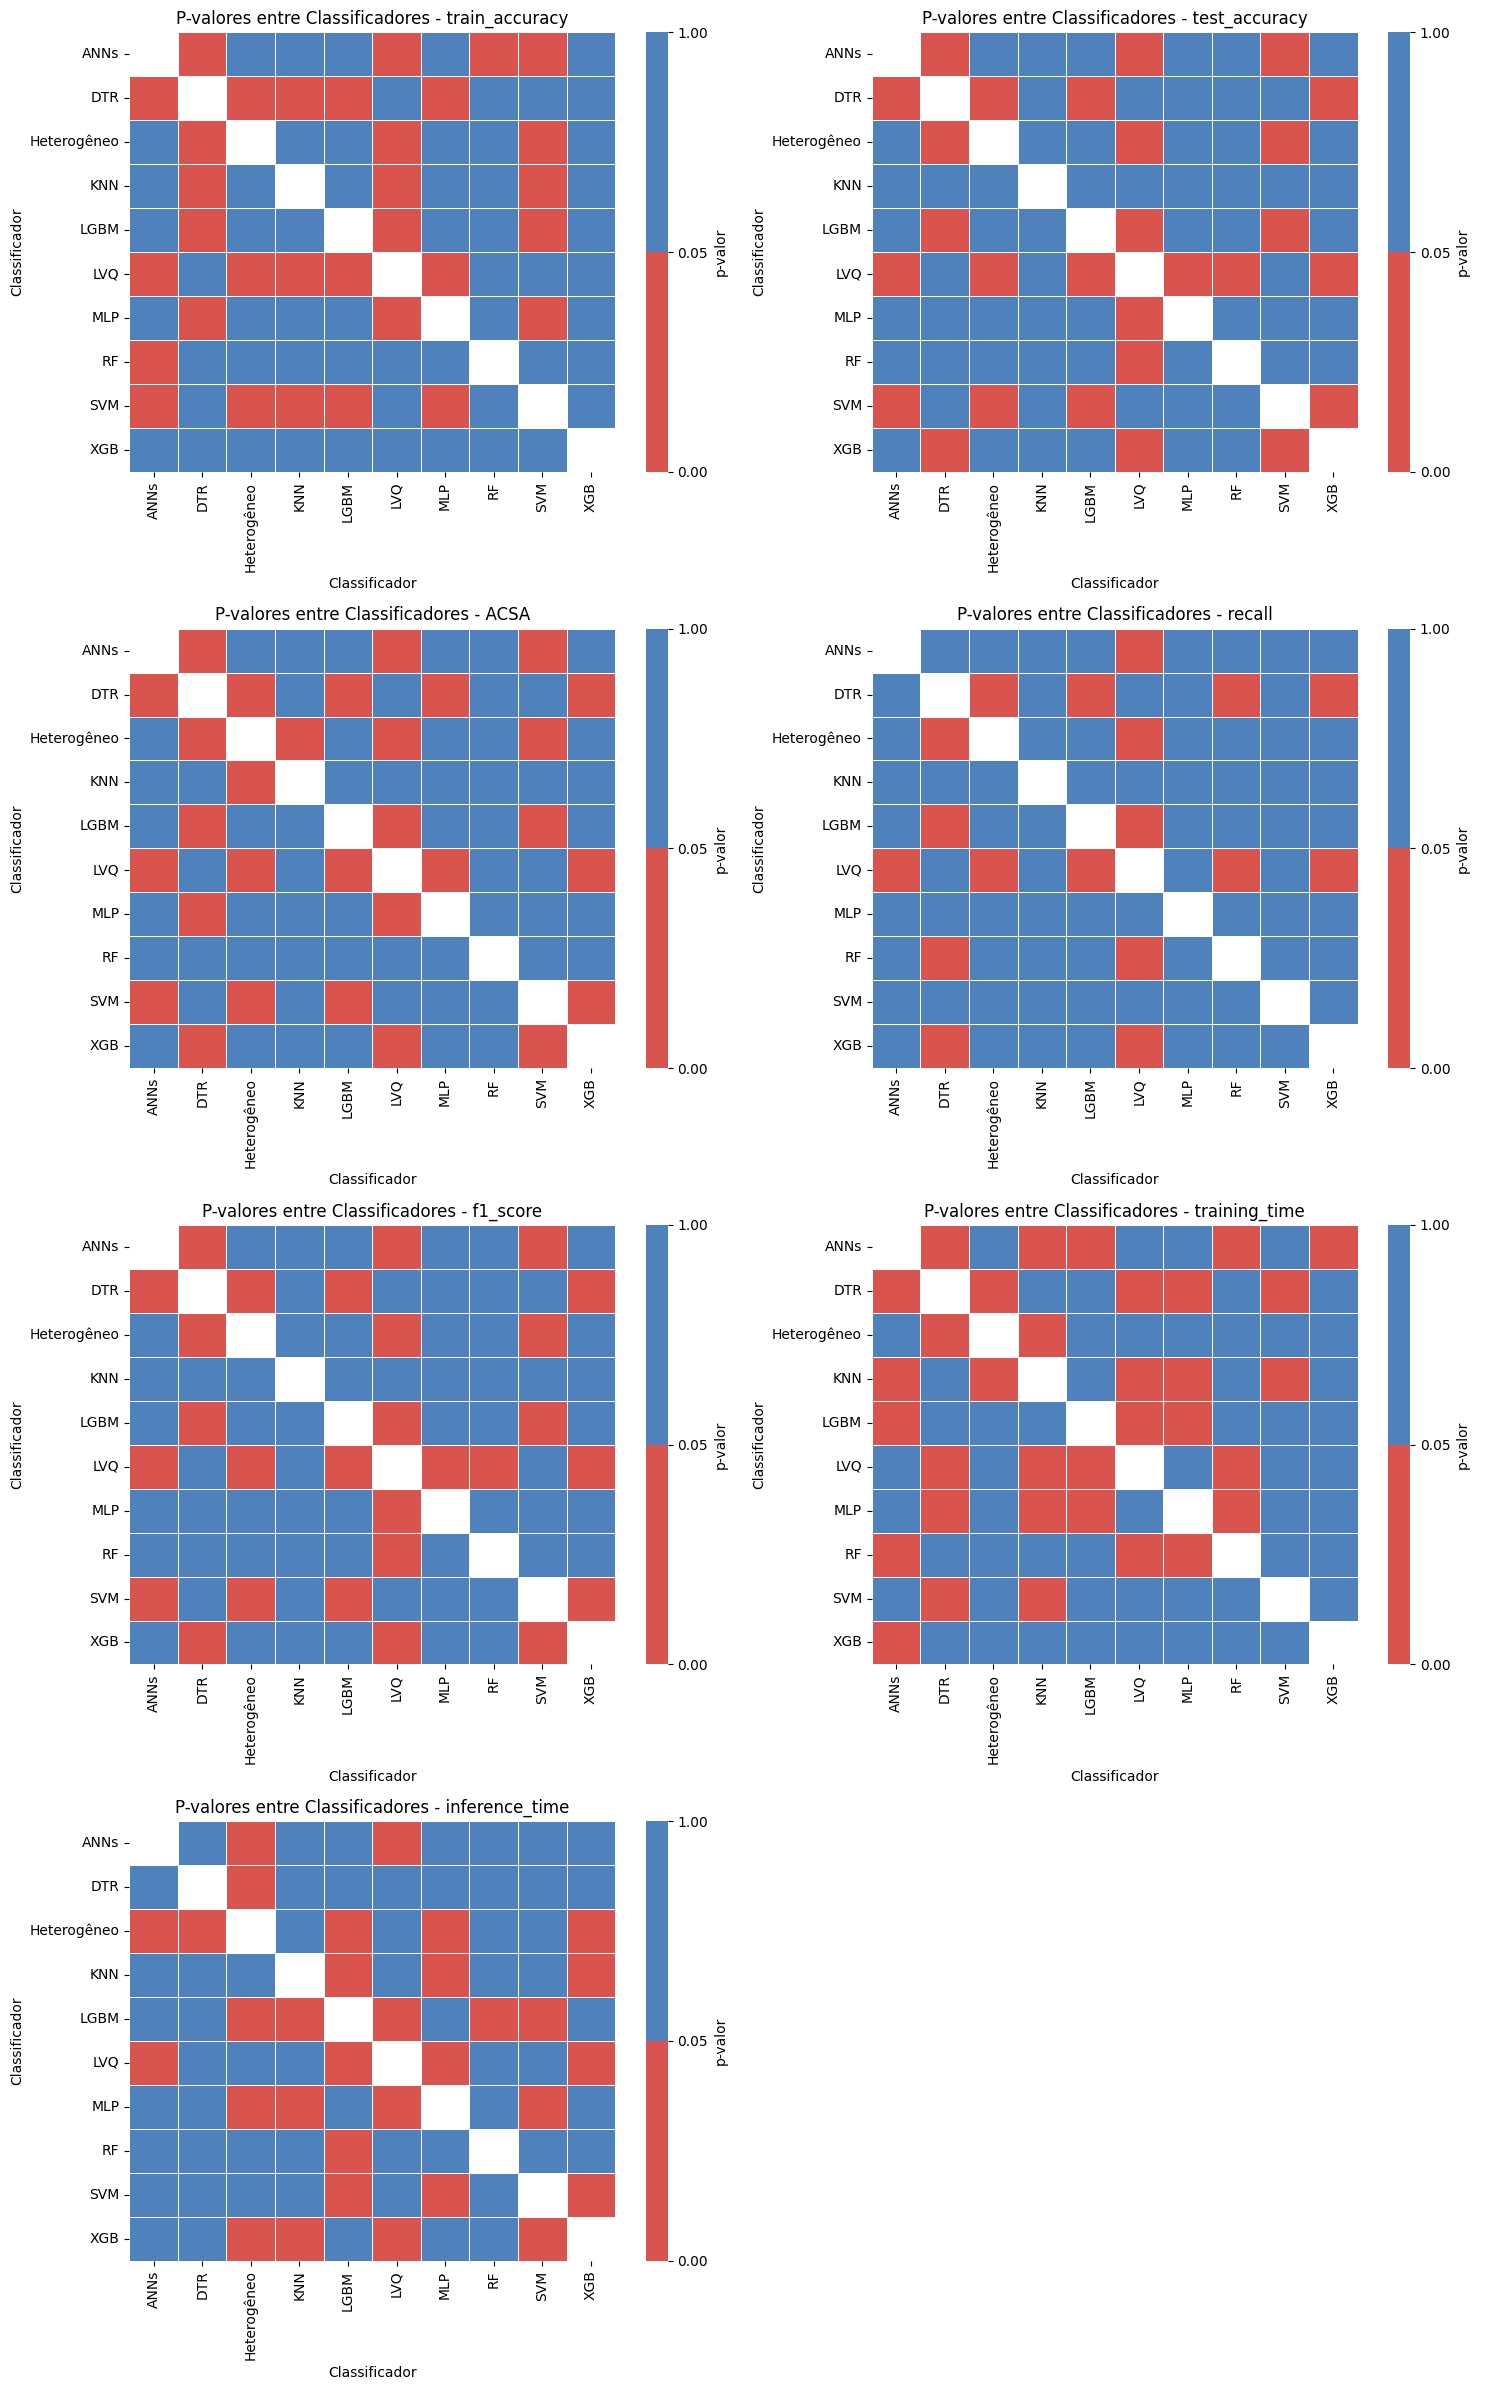

In [11]:

nemenyi_results[['classifier1', 'classifier2']] = nemenyi_results['classifier_pair'].str.split(' vs ', expand=True)

num_metrics = len(nemenyi_results['metric'].unique())
num_columns = 2
num_rows = math.ceil(num_metrics / num_columns)

fig, axes = plt.subplots(num_rows, num_columns, figsize=(15, 6 * num_rows))
axes = axes.flatten()

for i, metric in enumerate(nemenyi_results['metric'].unique()):
    metric_data = nemenyi_results[nemenyi_results['metric'] == metric]
    pivot_table = metric_data.pivot_table(index="classifier1", columns="classifier2", values="p-value").combine_first(metric_data.pivot_table(index="classifier2", columns="classifier1", values="p-value"))
    sns.heatmap(pivot_table, annot=False, fmt=".4f", cmap=mcolors.ListedColormap(["#D9534F", "#4F81BD"]), norm=mcolors.BoundaryNorm([0, 0.05, 1], 2), linewidths=0.5, cbar_kws={'label': 'p-valor'}, annot_kws={'color': 'white', 'fontsize': 10}, ax=axes[i])
    axes[i].set_title(f"P-valores entre Classificadores - {metric}")
    axes[i].set_xlabel("Classificador")
    axes[i].set_ylabel("Classificador")

for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()


In [13]:
nemenyi_results.loc[nemenyi_results['are_different'] == True]

,metric,classifier_pair,p-value,are_different,classifier1,classifier2
0,train_accuracy,KNN vs LVQ,2.724241e-05,True,KNN,LVQ
1,train_accuracy,KNN vs DTR,9.055827e-04,True,KNN,DTR
2,train_accuracy,KNN vs SVM,1.634887e-02,True,KNN,SVM
13,train_accuracy,LVQ vs LGBM,5.749325e-05,True,LVQ,LGBM
14,train_accuracy,LVQ vs MLP,8.281485e-05,True,LVQ,MLP
...,...,...,...,...,...,...
301,inference_time,RF vs LGBM,4.306208e-02,True,RF,LGBM
307,inference_time,XGB vs Heterogêneo,1.099139e-06,True,XGB,Heterogêneo
310,inference_time,LGBM vs Heterogêneo,4.973169e-08,True,LGBM,Heterogêneo
312,inference_time,MLP vs Heterogêneo,5.789859e-07,True,MLP,Heterogêneo


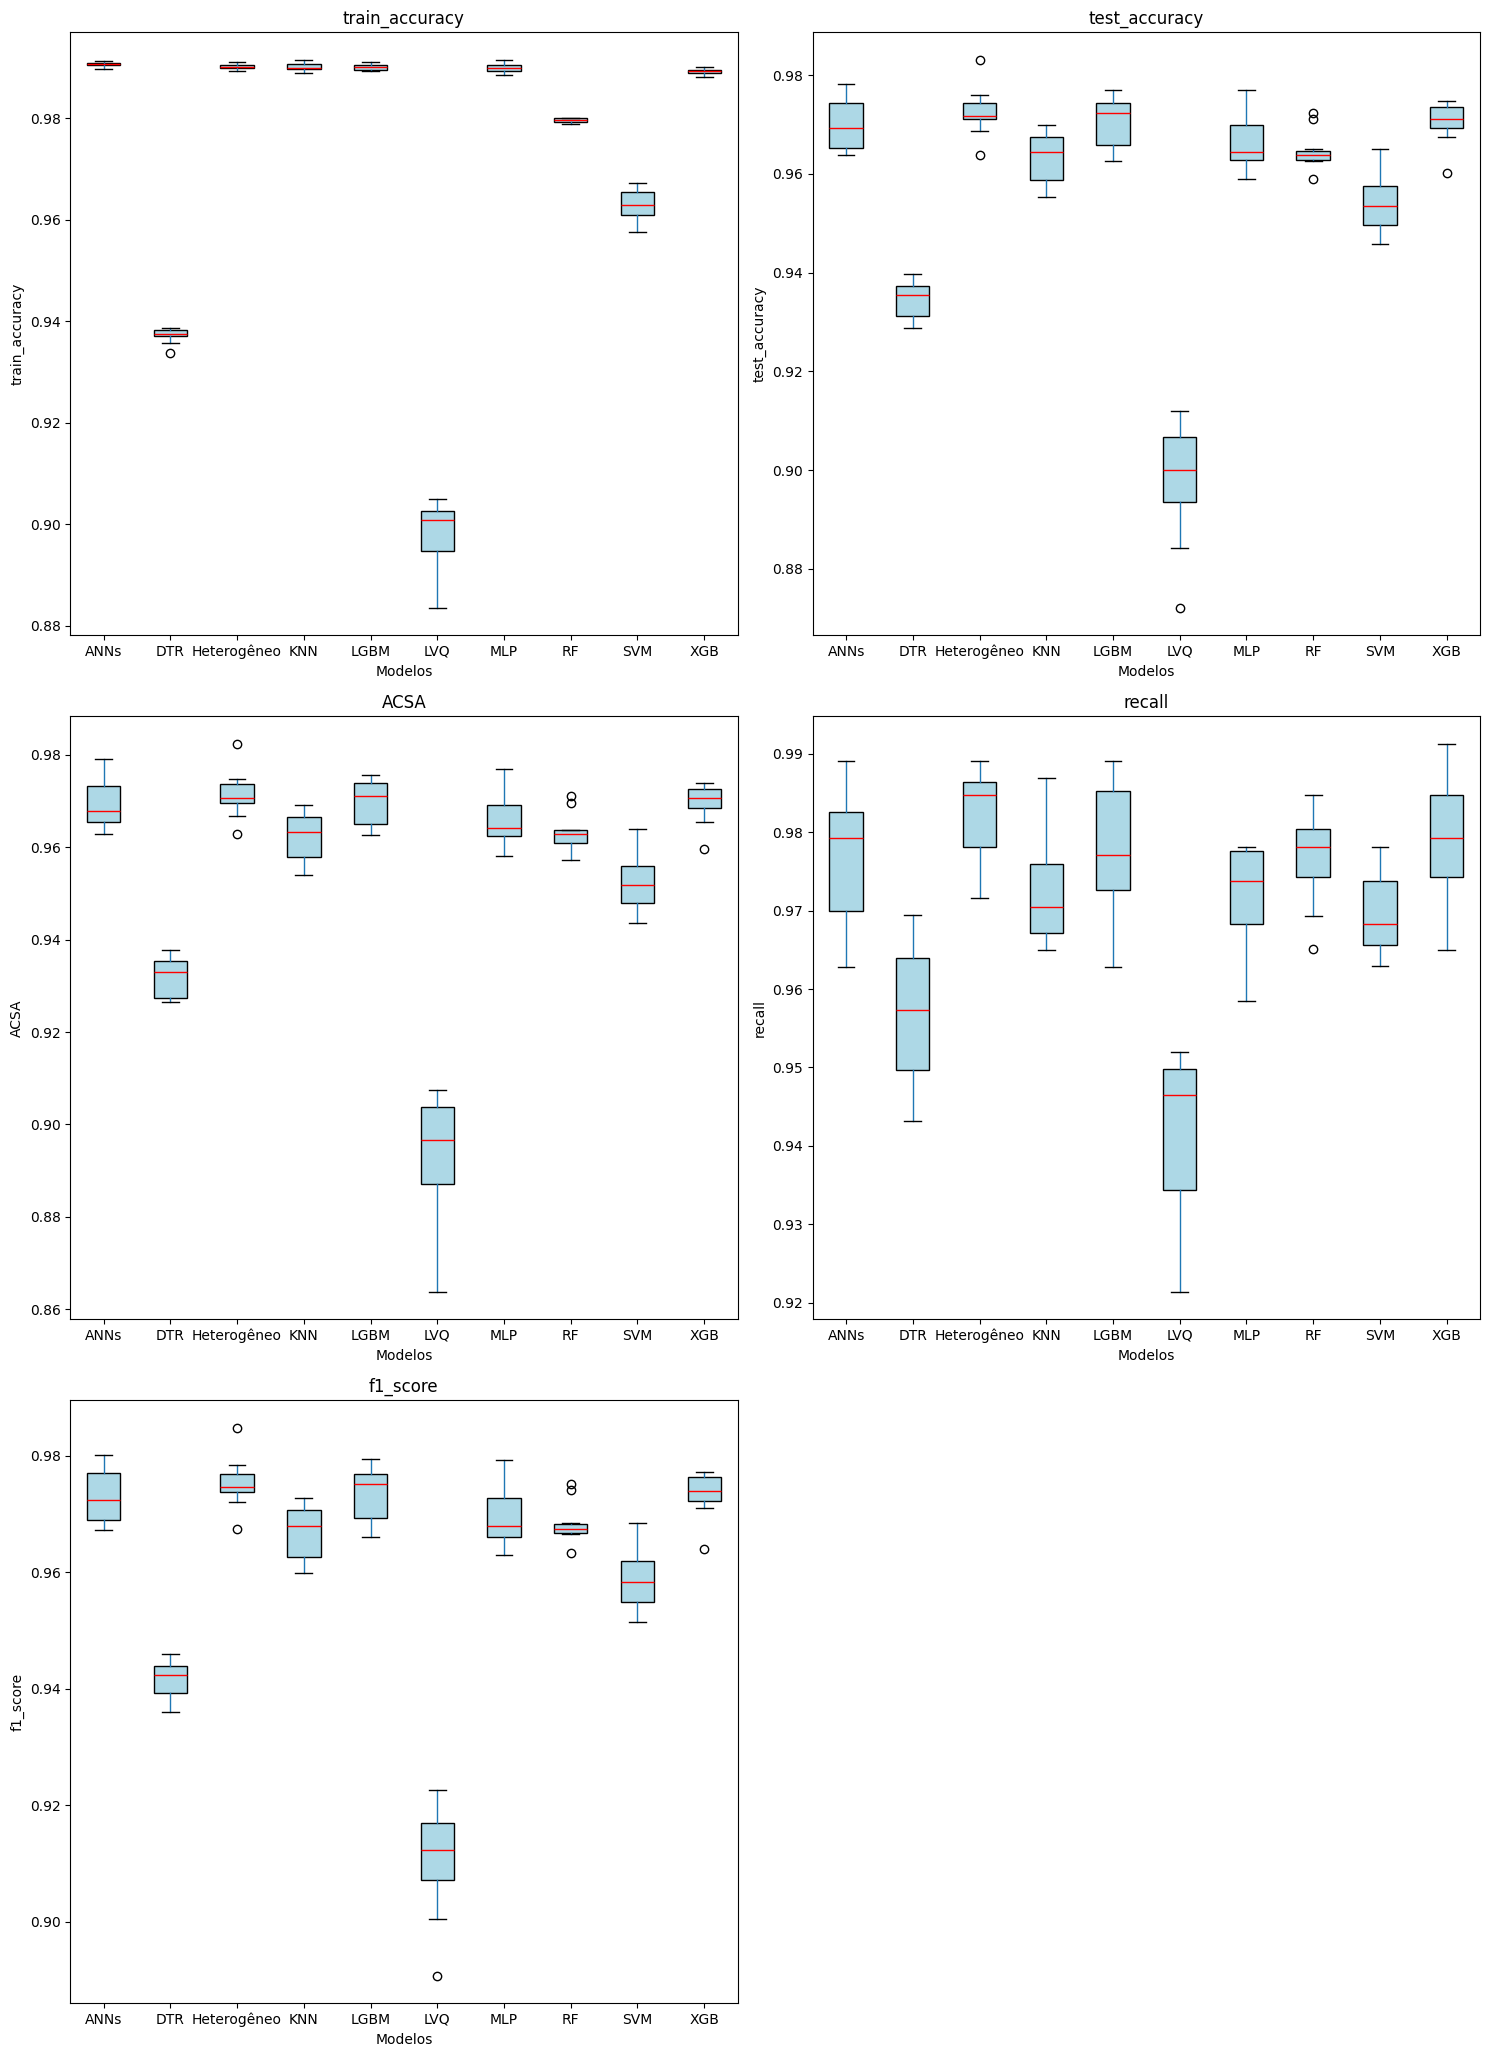

In [14]:
plot_metric_boxplots(
    list_of_model_results=list_of_model_results,
    list_of_model_names=list_of_model_names,
    list_of_metrics_names=['train_accuracy', 'test_accuracy', 'ACSA', 'recall', 'f1_score']
)

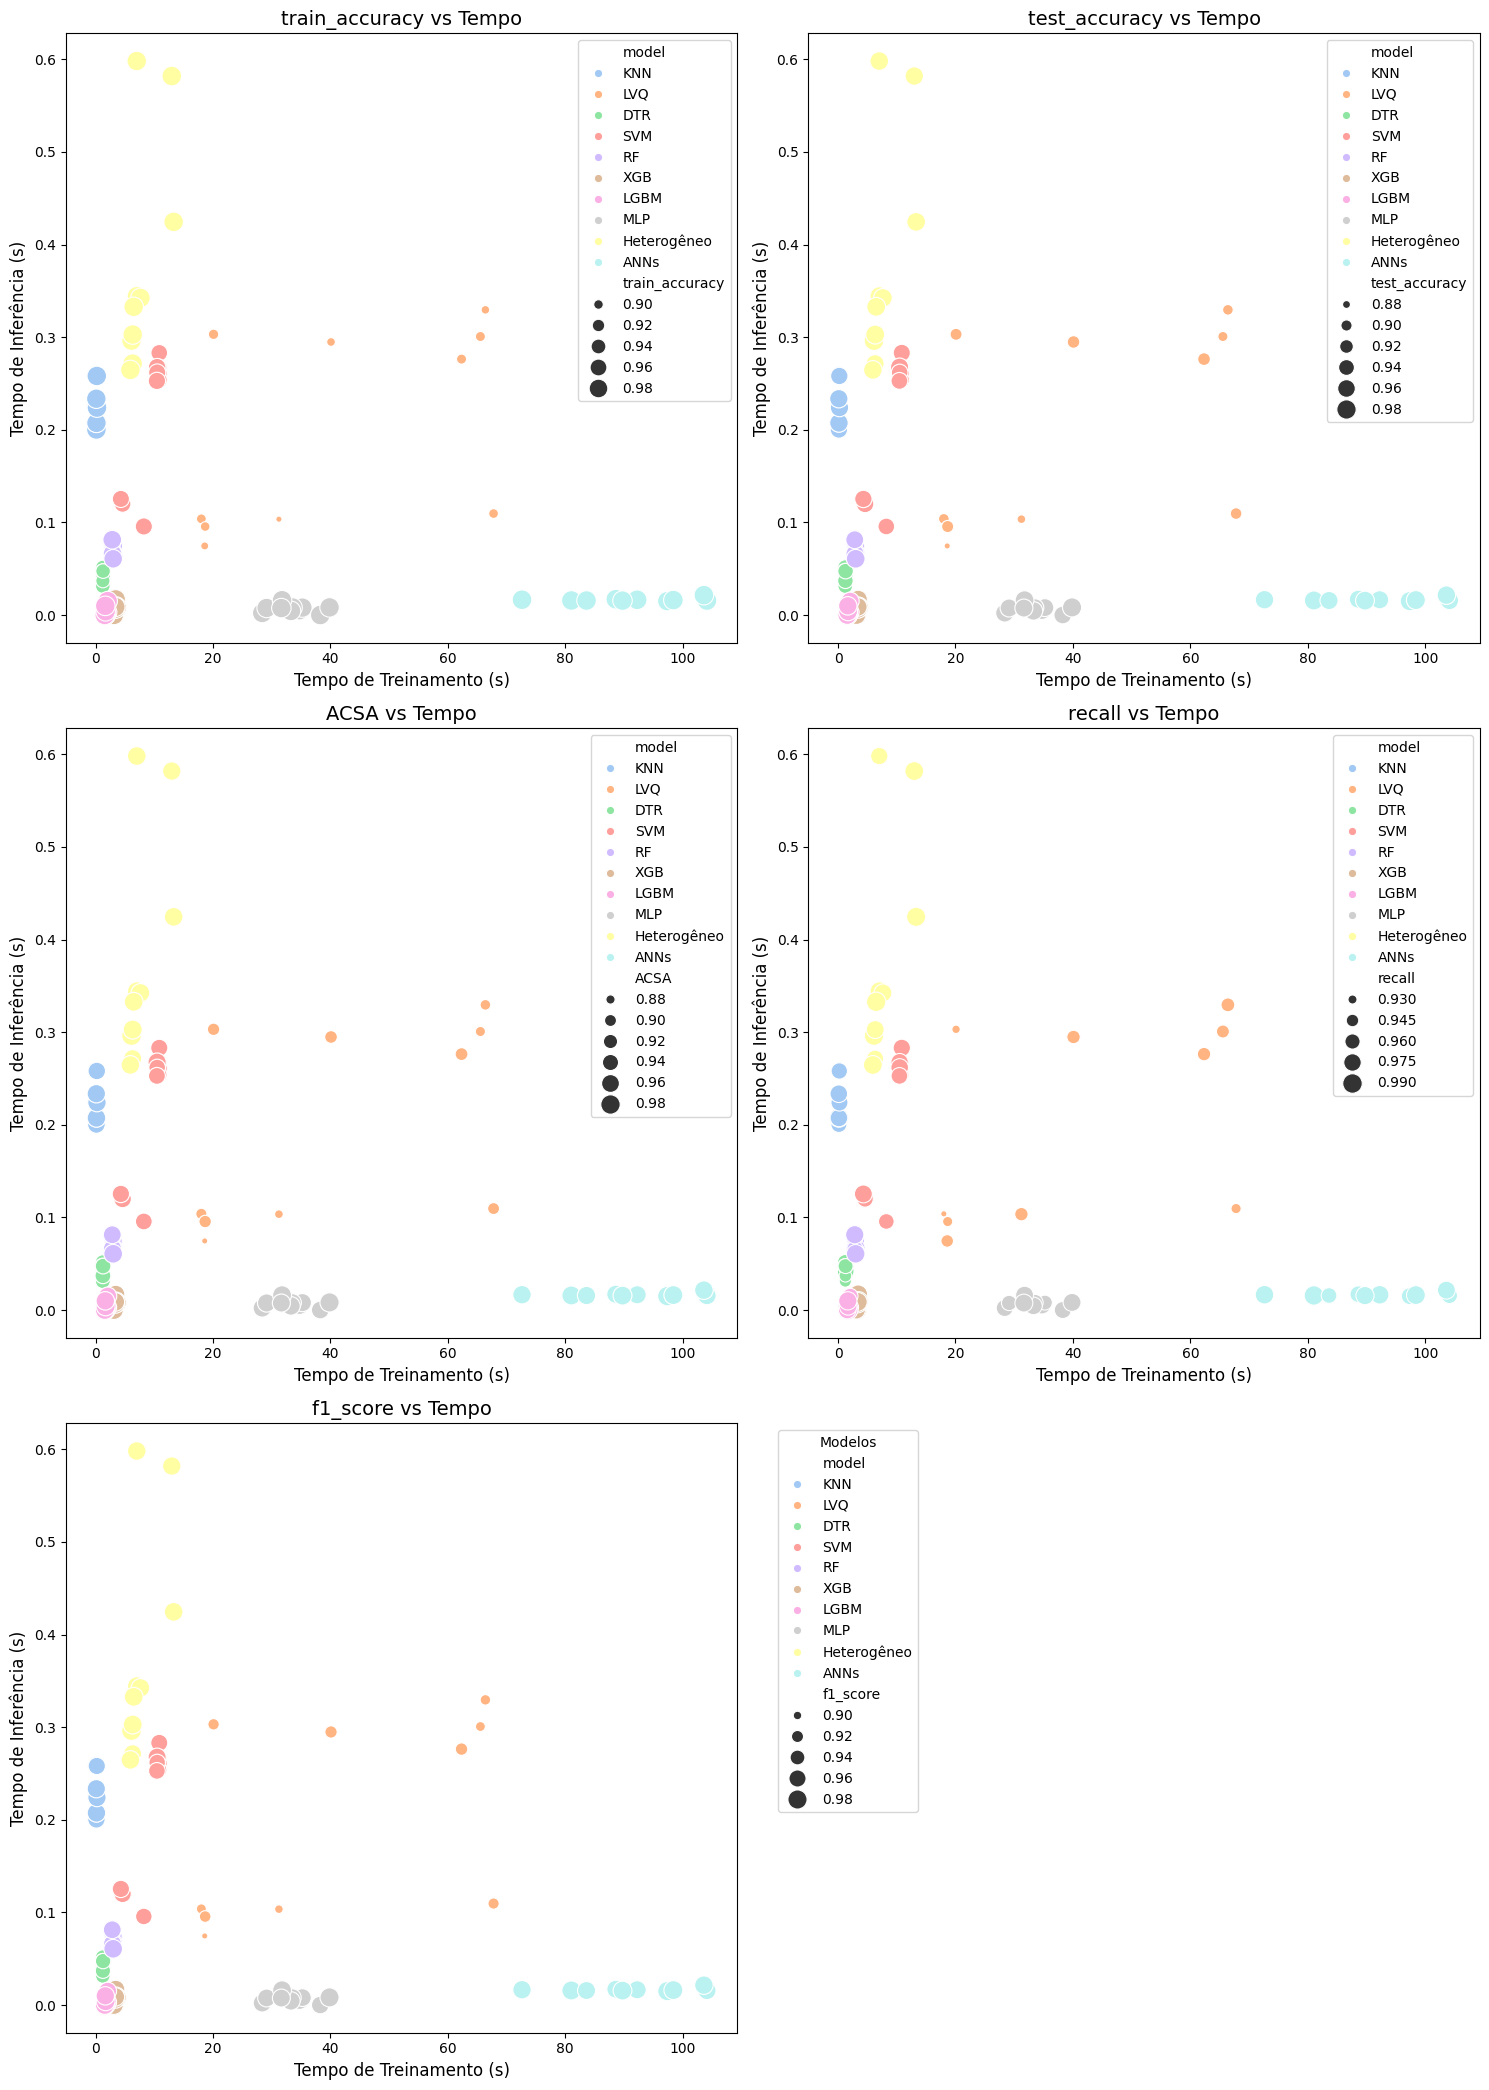

In [15]:
plot_time_vs_performance_scatter(
    list_of_model_results=list_of_model_results,
    list_of_model_names=list_of_model_names,
    list_of_metrics_names=['train_accuracy', 'test_accuracy', 'ACSA', 'recall', 'f1_score']
)


# Com ADASYN

In [16]:
best_pipelines, ensembles = models_to_cv()

metrics = {}
for model in best_pipelines.keys():
    metrics[model] = pd.read_csv(f'../metrics/metrics_adasyn_{model}_cv.csv')
for model in ensembles.keys():
    metrics[model] = pd.read_csv(f'../metrics/metrics_adasyn_{model}_cv.csv')

In [17]:
list_of_model_results = [metrics[model] for model in metrics.keys()]
list_of_model_names = list(metrics.keys())
list_of_metrics_names = ['train_accuracy', 'test_accuracy', 'ACSA', 'recall', 'f1_score', 'training_time', 'inference_time']

comp = StatisticalMethods(list_of_model_results, list_of_model_names, list_of_metrics_names)

friedman_results, metrics_with_difference = comp.friedman_test()

nemenyi_results = comp.nemenyi_test(metrics_with_difference)

In [18]:
comp.get_estimate_and_ci()

,model,metric,mean,std,ci
0,KNN,train_accuracy,0.987834,0.000697,"0.9874, 0.9883"
1,KNN,test_accuracy,0.961765,0.005067,"0.9586, 0.9649"
2,KNN,ACSA,0.961865,0.005041,"0.9587, 0.9650"
3,KNN,recall,0.960878,0.007498,"0.9562, 0.9655"
4,KNN,f1_score,0.965199,0.004653,"0.9623, 0.9681"
...,...,...,...,...,...
65,ANNs,ACSA,0.965955,0.004566,"0.9631, 0.9688"
66,ANNs,recall,0.967440,0.007597,"0.9627, 0.9721"
67,ANNs,f1_score,0.969242,0.003868,"0.9668, 0.9716"
68,ANNs,training_time,114.068195,10.602702,"107.4966, 120.6398"


In [19]:
estimates_and_cis = comp.get_formatted_estimate_and_ci()
estimates_and_cis

,Modelo,Métrica,Média,Desvio,IC
0,KNN,Acurácia de treino,98.78,0.07,"[98.74 , 98.83]"
1,KNN,Acurácia de teste,96.18,0.51,"[95.86 , 96.49]"
2,KNN,ACSA,96.19,0.50,"[95.87 , 96.50]"
3,KNN,Recall,96.09,0.75,"[95.62 , 96.55]"
4,KNN,F1-score,96.52,0.47,"[96.23 , 96.81]"
...,...,...,...,...,...
65,ANNs,ACSA,96.60,0.46,"[96.31 , 96.88]"
66,ANNs,Recall,96.74,0.76,"[96.27 , 97.21]"
67,ANNs,F1-score,96.92,0.39,"[96.68 , 97.16]"
68,ANNs,Tempo de treinamento,114.10,10.60,"[10749.66 , 12063.98]"


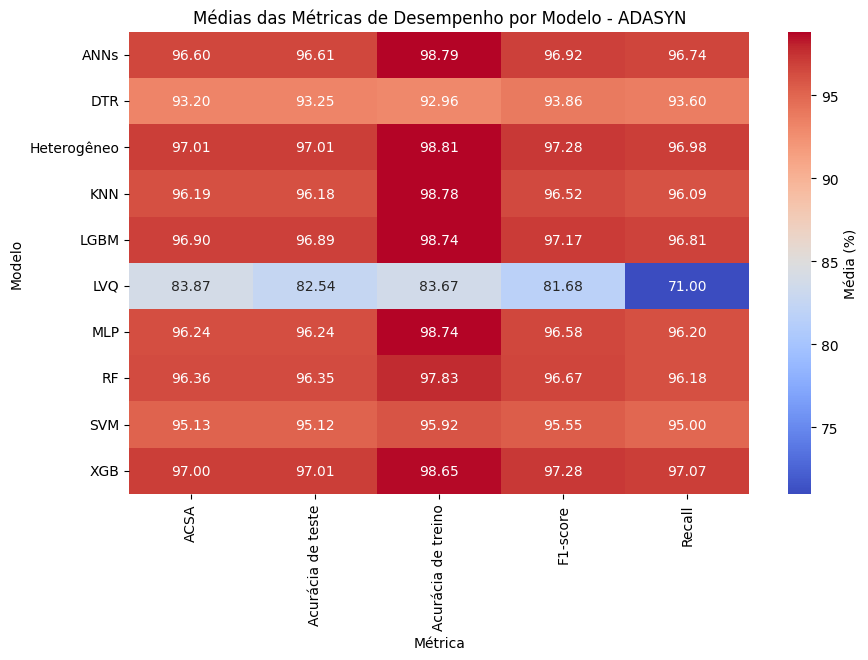

In [20]:
filtered_data = estimates_and_cis[estimates_and_cis['Métrica'].isin(['ACSA', 'Recall', 'F1-score', 'Acurácia de treino', 'Acurácia de teste'])]
heatmap_data = filtered_data.pivot(index="Modelo", columns="Métrica", values="Média")

plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, fmt=".2f", cmap="coolwarm", cbar_kws={'label': 'Média (%)'})
plt.title("Médias das Métricas de Desempenho por Modelo - ADASYN")
plt.xlabel("Métrica")
plt.ylabel("Modelo")
plt.show()

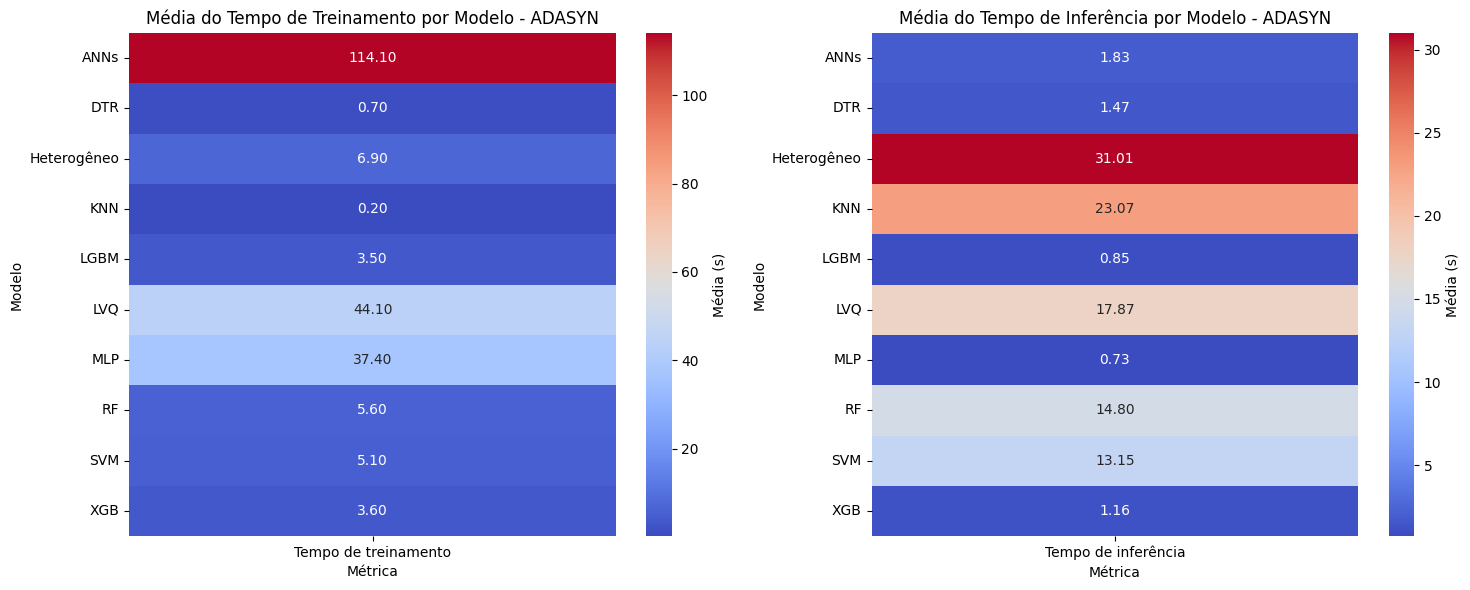

In [21]:
filtered_training_time = estimates_and_cis[estimates_and_cis['Métrica'] == 'Tempo de treinamento']
heatmap_training_time = filtered_training_time.pivot(index="Modelo", columns="Métrica", values="Média")

filtered_inference_time = estimates_and_cis[estimates_and_cis['Métrica'] == 'Tempo de inferência']
heatmap_inference_time = filtered_inference_time.pivot(index="Modelo", columns="Métrica", values="Média")

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

sns.heatmap(heatmap_training_time, annot=True, fmt=".2f", cmap="coolwarm", cbar_kws={'label': 'Média (s)'}, ax=axes[0])
axes[0].set_title("Média do Tempo de Treinamento por Modelo - ADASYN")
axes[0].set_xlabel("Métrica")
axes[0].set_ylabel("Modelo")

sns.heatmap(heatmap_inference_time, annot=True, fmt=".2f", cmap="coolwarm", cbar_kws={'label': 'Média (s)'}, ax=axes[1])
axes[1].set_title("Média do Tempo de Inferência por Modelo - ADASYN")
axes[1].set_xlabel("Métrica")
axes[1].set_ylabel("Modelo")

plt.tight_layout()
plt.show()

In [22]:
friedman_results

,metric,statistic,p-value,are_different
0,train_accuracy,83.524590,3.213641e-14,True
1,test_accuracy,77.606467,4.822451e-13,True
2,ACSA,75.949091,1.026208e-12,True
3,recall,71.260123,8.615914e-12,True
4,f1_score,77.934545,4.152101e-13,True
5,training_time,84.850909,1.747230e-14,True
6,inference_time,78.706311,2.919196e-13,True


In [23]:
nemenyi_results

,metric,classifier_pair,p-value,are_different
0,train_accuracy,KNN vs LVQ,2.534819e-06,True
1,train_accuracy,KNN vs DTR,1.186085e-04,True
2,train_accuracy,KNN vs SVM,3.111911e-03,True
3,train_accuracy,KNN vs RF,4.306208e-02,True
4,train_accuracy,KNN vs XGB,2.824268e-01,False
...,...,...,...,...
310,inference_time,LGBM vs Heterogêneo,3.113046e-06,True
311,inference_time,LGBM vs ANNs,9.968984e-01,False
312,inference_time,MLP vs Heterogêneo,6.258589e-08,True
313,inference_time,MLP vs ANNs,8.713463e-01,False


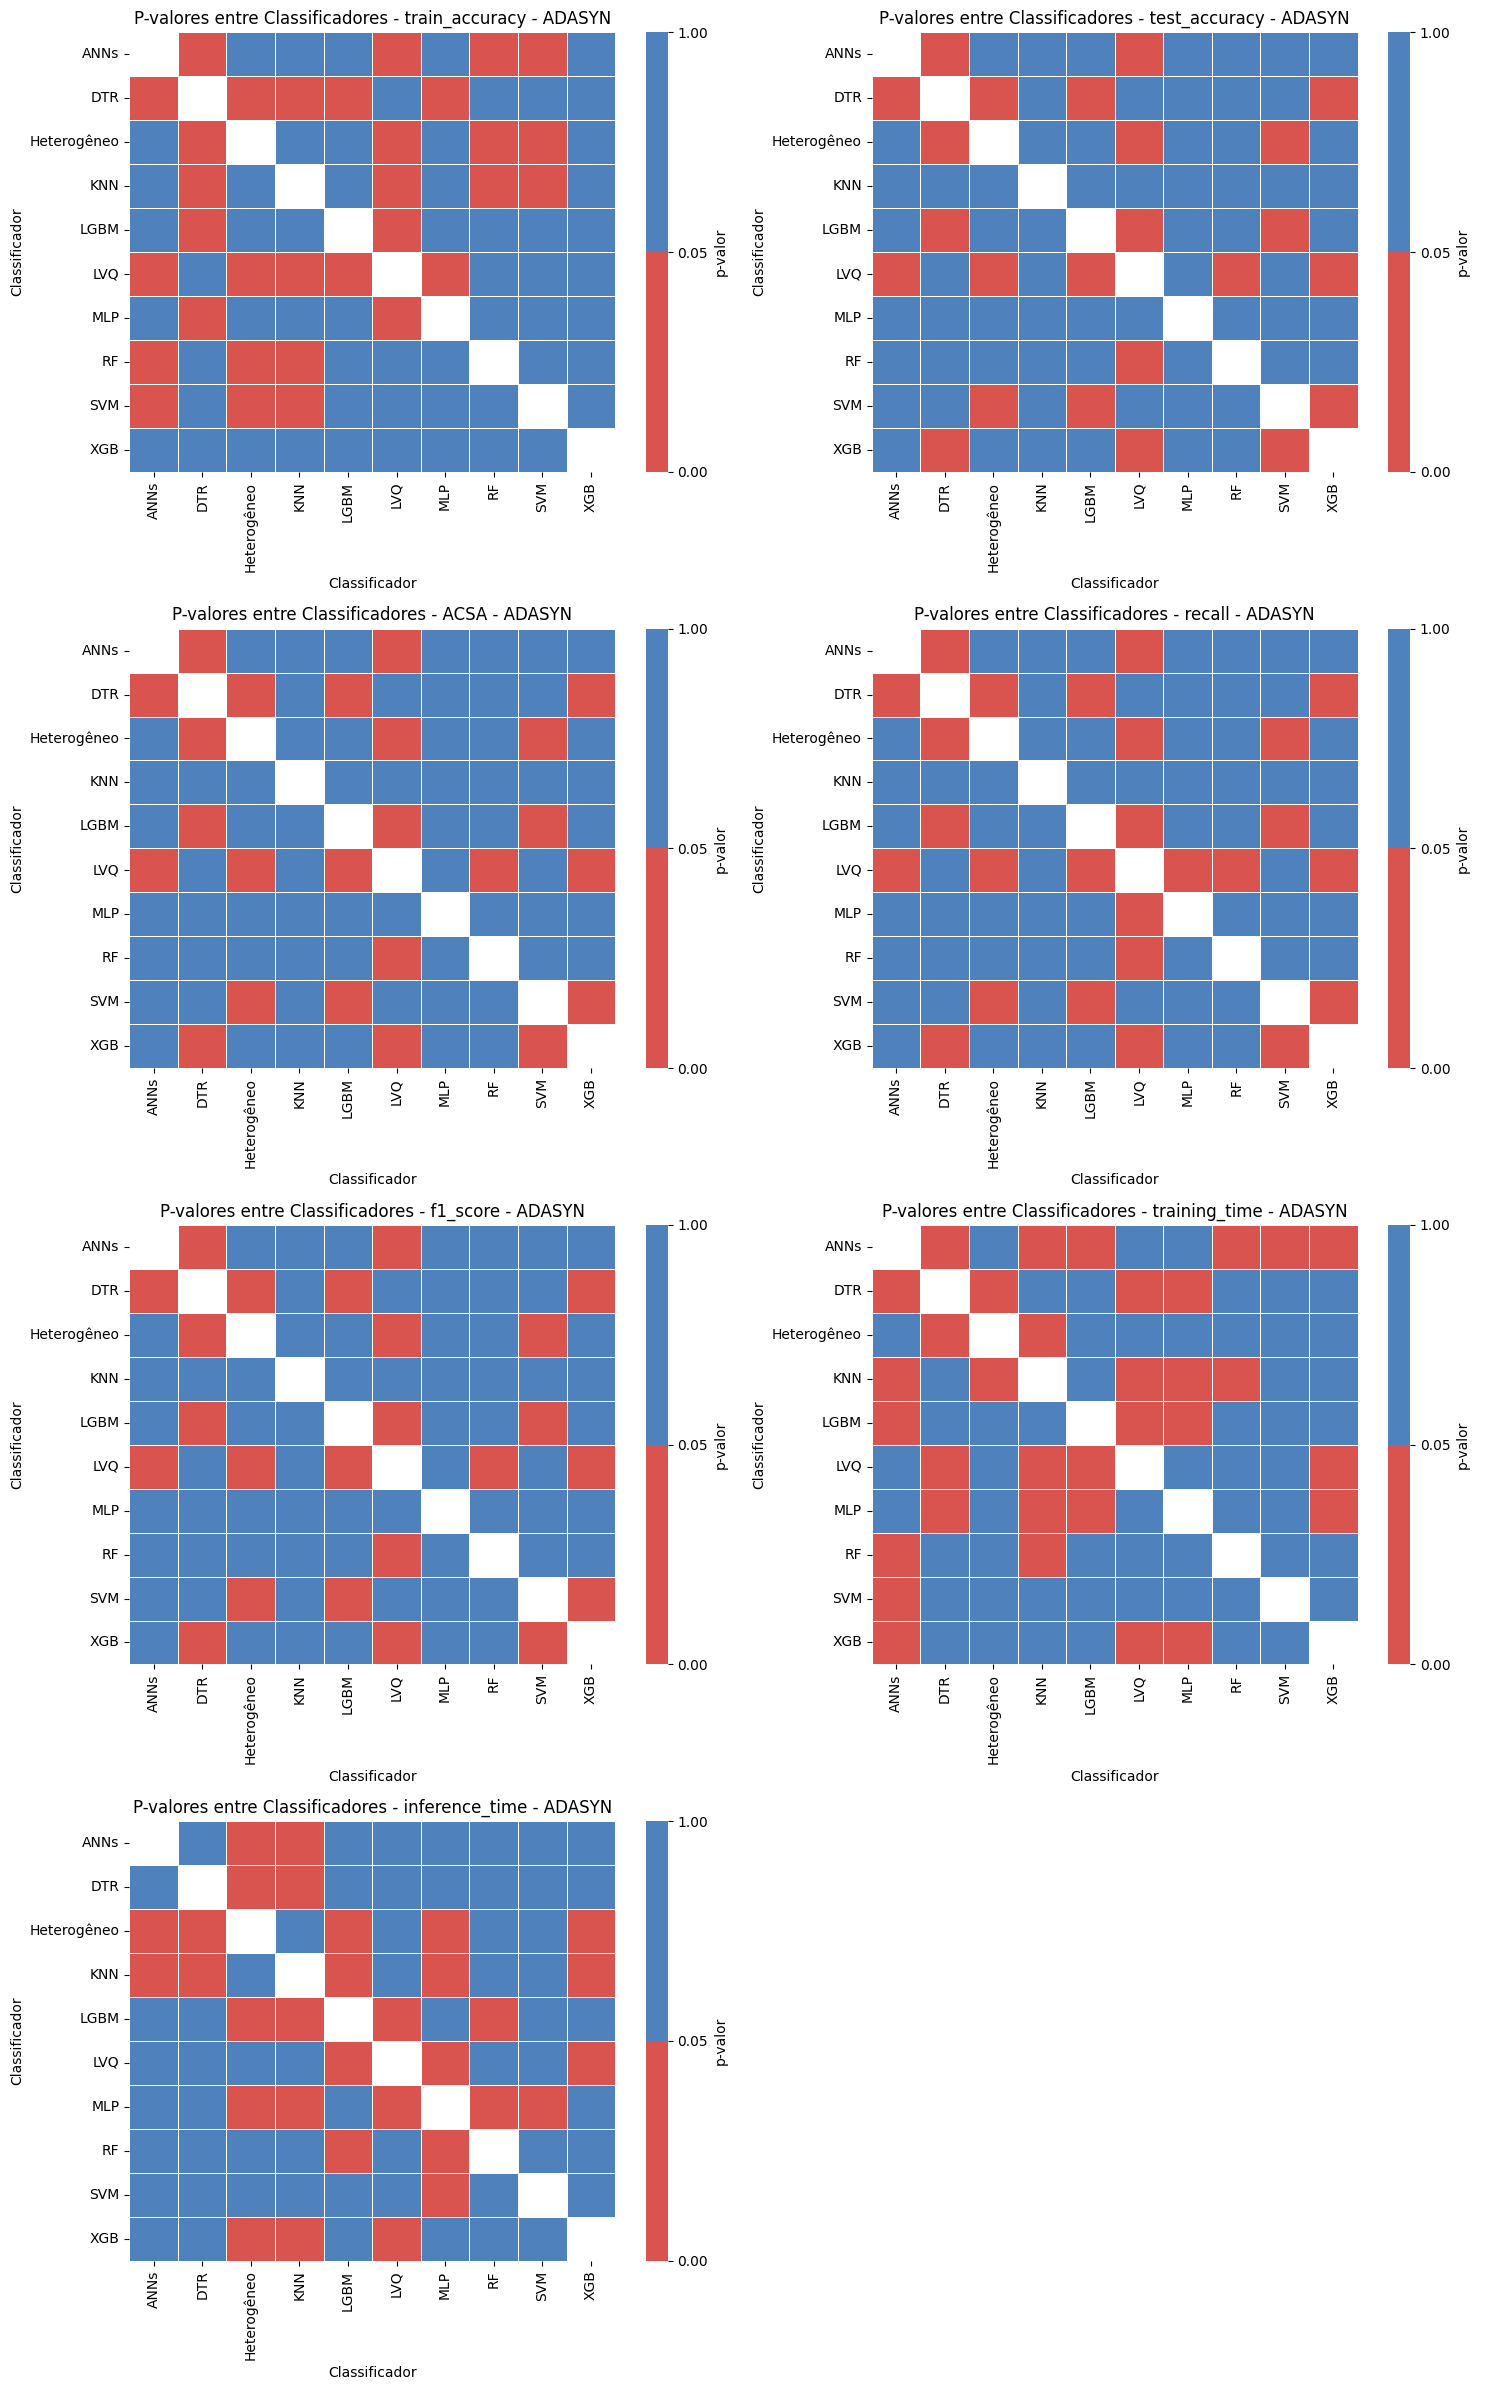

In [24]:

nemenyi_results[['classifier1', 'classifier2']] = nemenyi_results['classifier_pair'].str.split(' vs ', expand=True)

num_metrics = len(nemenyi_results['metric'].unique())
num_columns = 2
num_rows = math.ceil(num_metrics / num_columns)

fig, axes = plt.subplots(num_rows, num_columns, figsize=(15, 6 * num_rows))
axes = axes.flatten()

for i, metric in enumerate(nemenyi_results['metric'].unique()):
    metric_data = nemenyi_results[nemenyi_results['metric'] == metric]
    pivot_table = metric_data.pivot_table(index="classifier1", columns="classifier2", values="p-value").combine_first(metric_data.pivot_table(index="classifier2", columns="classifier1", values="p-value"))
    sns.heatmap(pivot_table, annot=False, fmt=".4f", cmap=mcolors.ListedColormap(["#D9534F", "#4F81BD"]), norm=mcolors.BoundaryNorm([0, 0.05, 1], 2), linewidths=0.5, cbar_kws={'label': 'p-valor'}, annot_kws={'color': 'white', 'fontsize': 10}, ax=axes[i])
    axes[i].set_title(f"P-valores entre Classificadores - {metric} - ADASYN")
    axes[i].set_xlabel("Classificador")
    axes[i].set_ylabel("Classificador")

for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()


In [25]:
nemenyi_results.loc[nemenyi_results['are_different'] == True]

,metric,classifier_pair,p-value,are_different,classifier1,classifier2
0,train_accuracy,KNN vs LVQ,2.534819e-06,True,KNN,LVQ
1,train_accuracy,KNN vs DTR,1.186085e-04,True,KNN,DTR
2,train_accuracy,KNN vs SVM,3.111911e-03,True,KNN,SVM
3,train_accuracy,KNN vs RF,4.306208e-02,True,KNN,RF
13,train_accuracy,LVQ vs LGBM,3.365541e-04,True,LVQ,LGBM
...,...,...,...,...,...,...
302,inference_time,RF vs MLP,3.605592e-03,True,RF,MLP
307,inference_time,XGB vs Heterogêneo,1.037695e-05,True,XGB,Heterogêneo
310,inference_time,LGBM vs Heterogêneo,3.113046e-06,True,LGBM,Heterogêneo
312,inference_time,MLP vs Heterogêneo,6.258589e-08,True,MLP,Heterogêneo


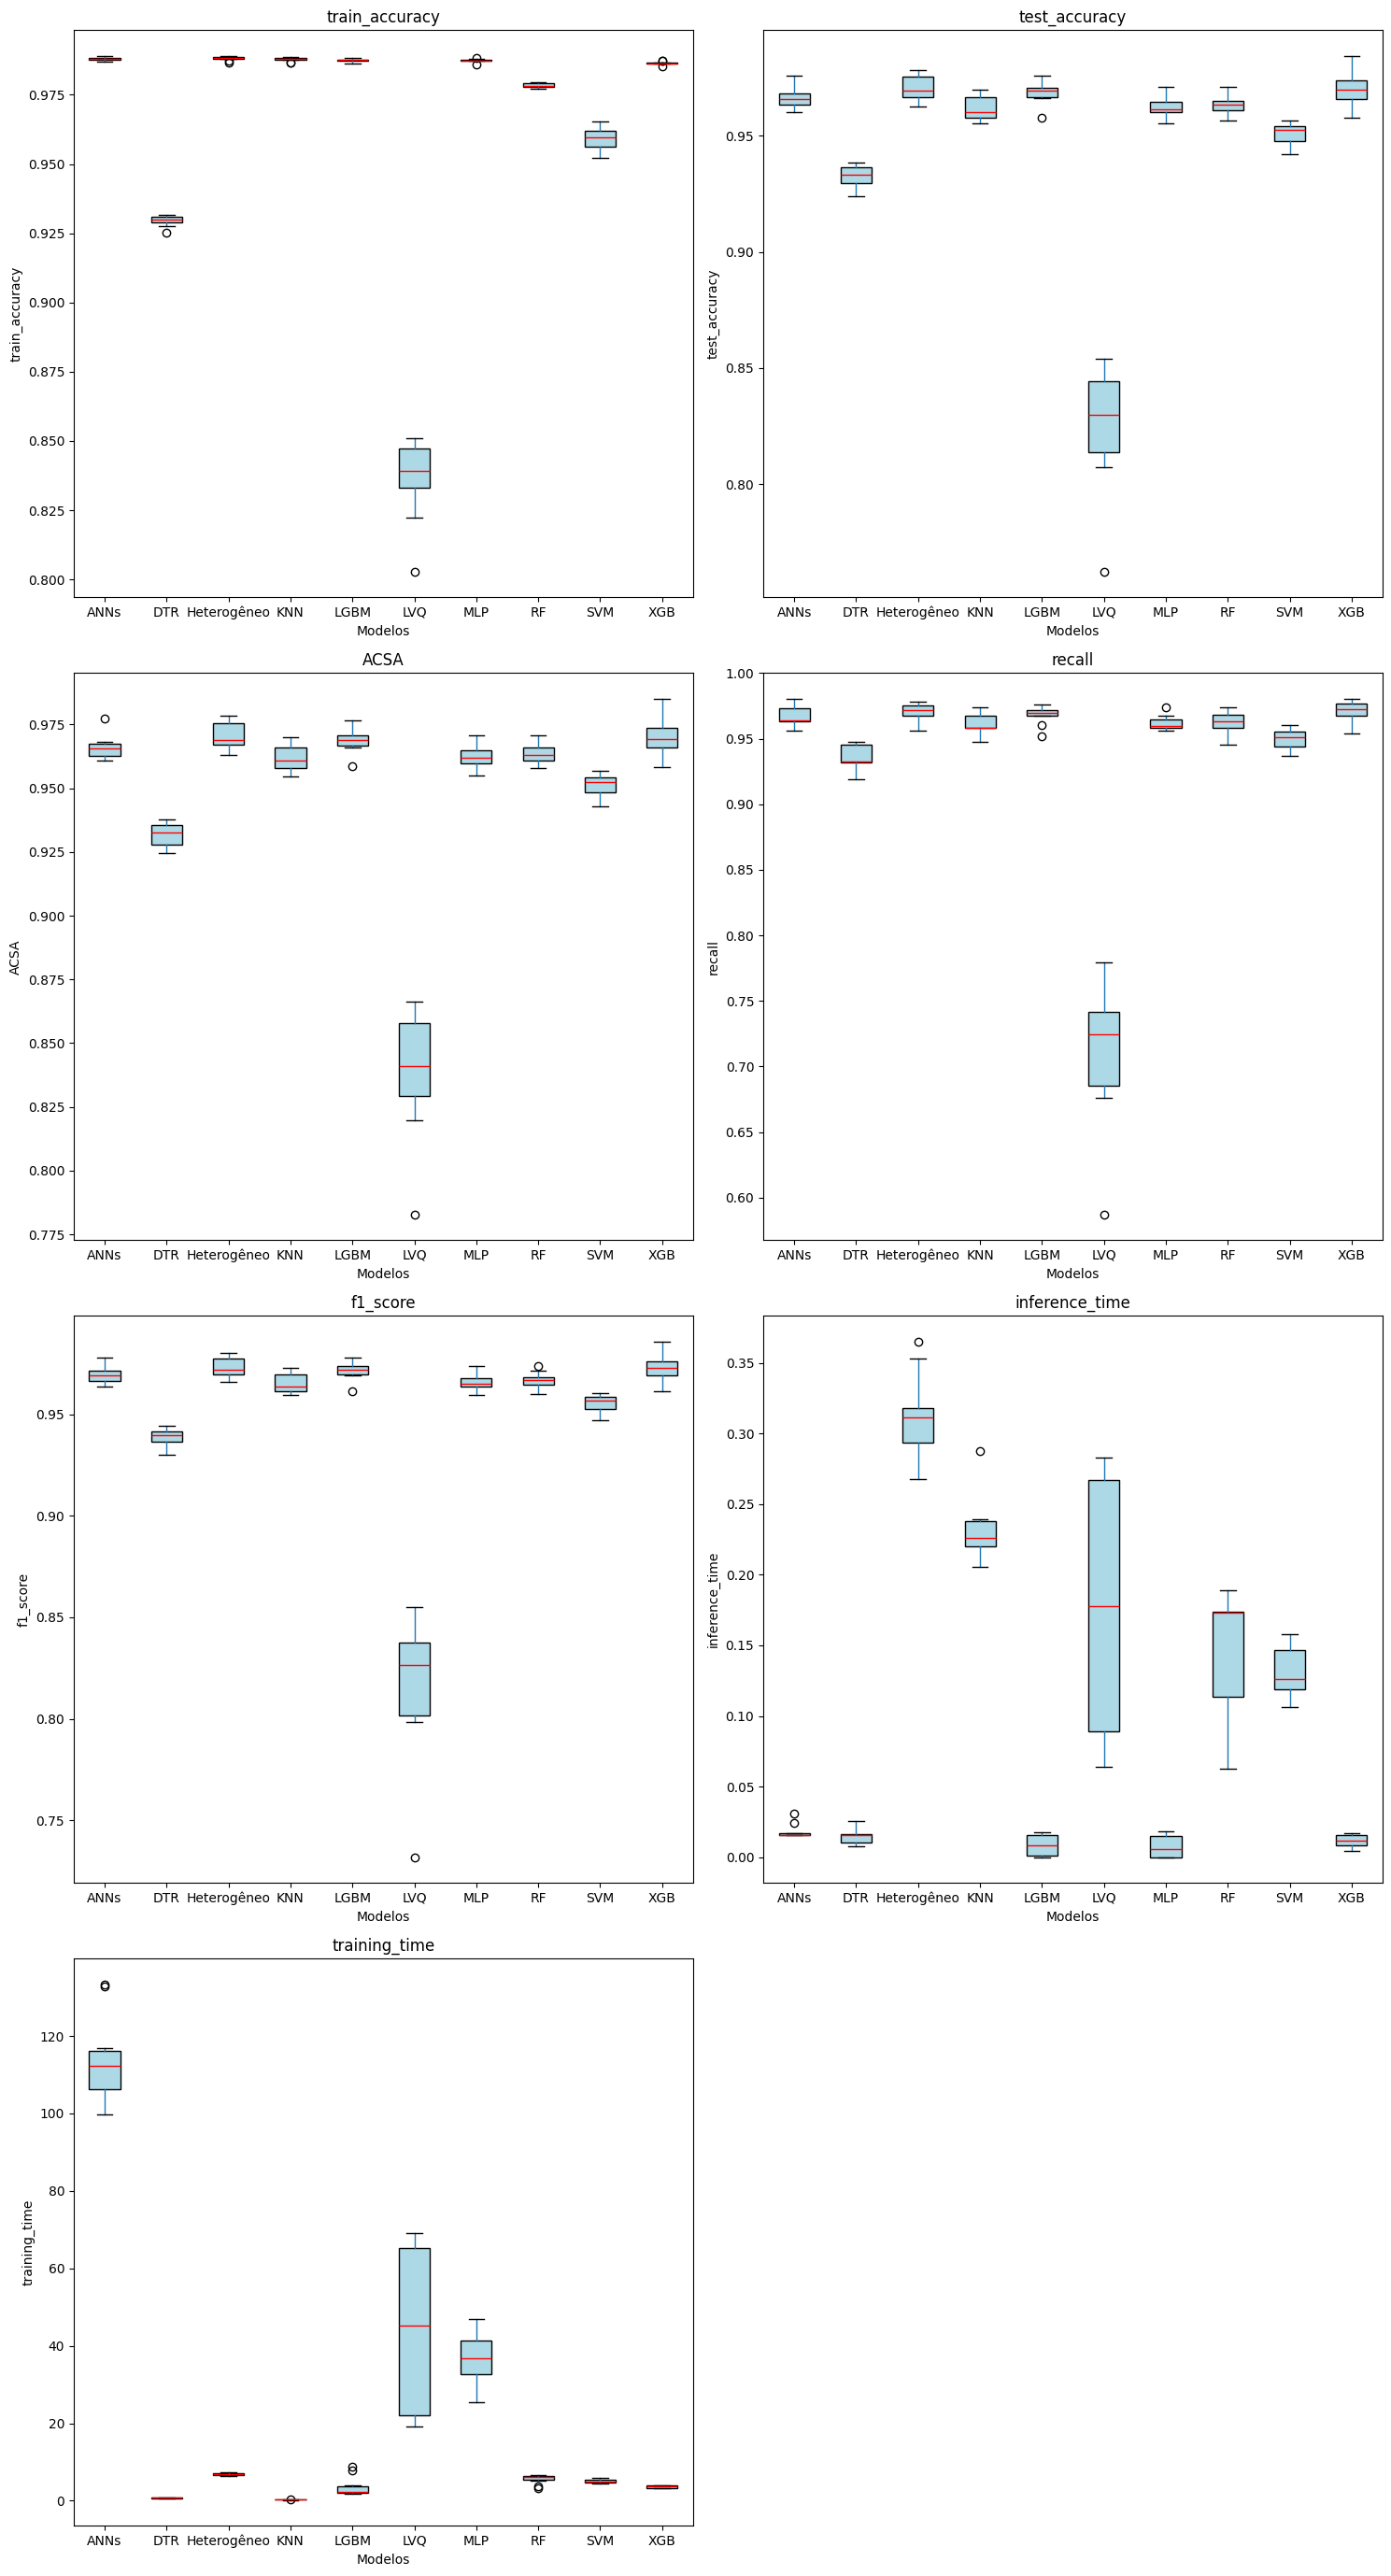

In [26]:
plot_metric_boxplots(
    list_of_model_results=list_of_model_results,
    list_of_model_names=list_of_model_names,
    list_of_metrics_names=['train_accuracy', 'test_accuracy', 'ACSA', 'recall', 'f1_score', 'inference_time', 'training_time']
)

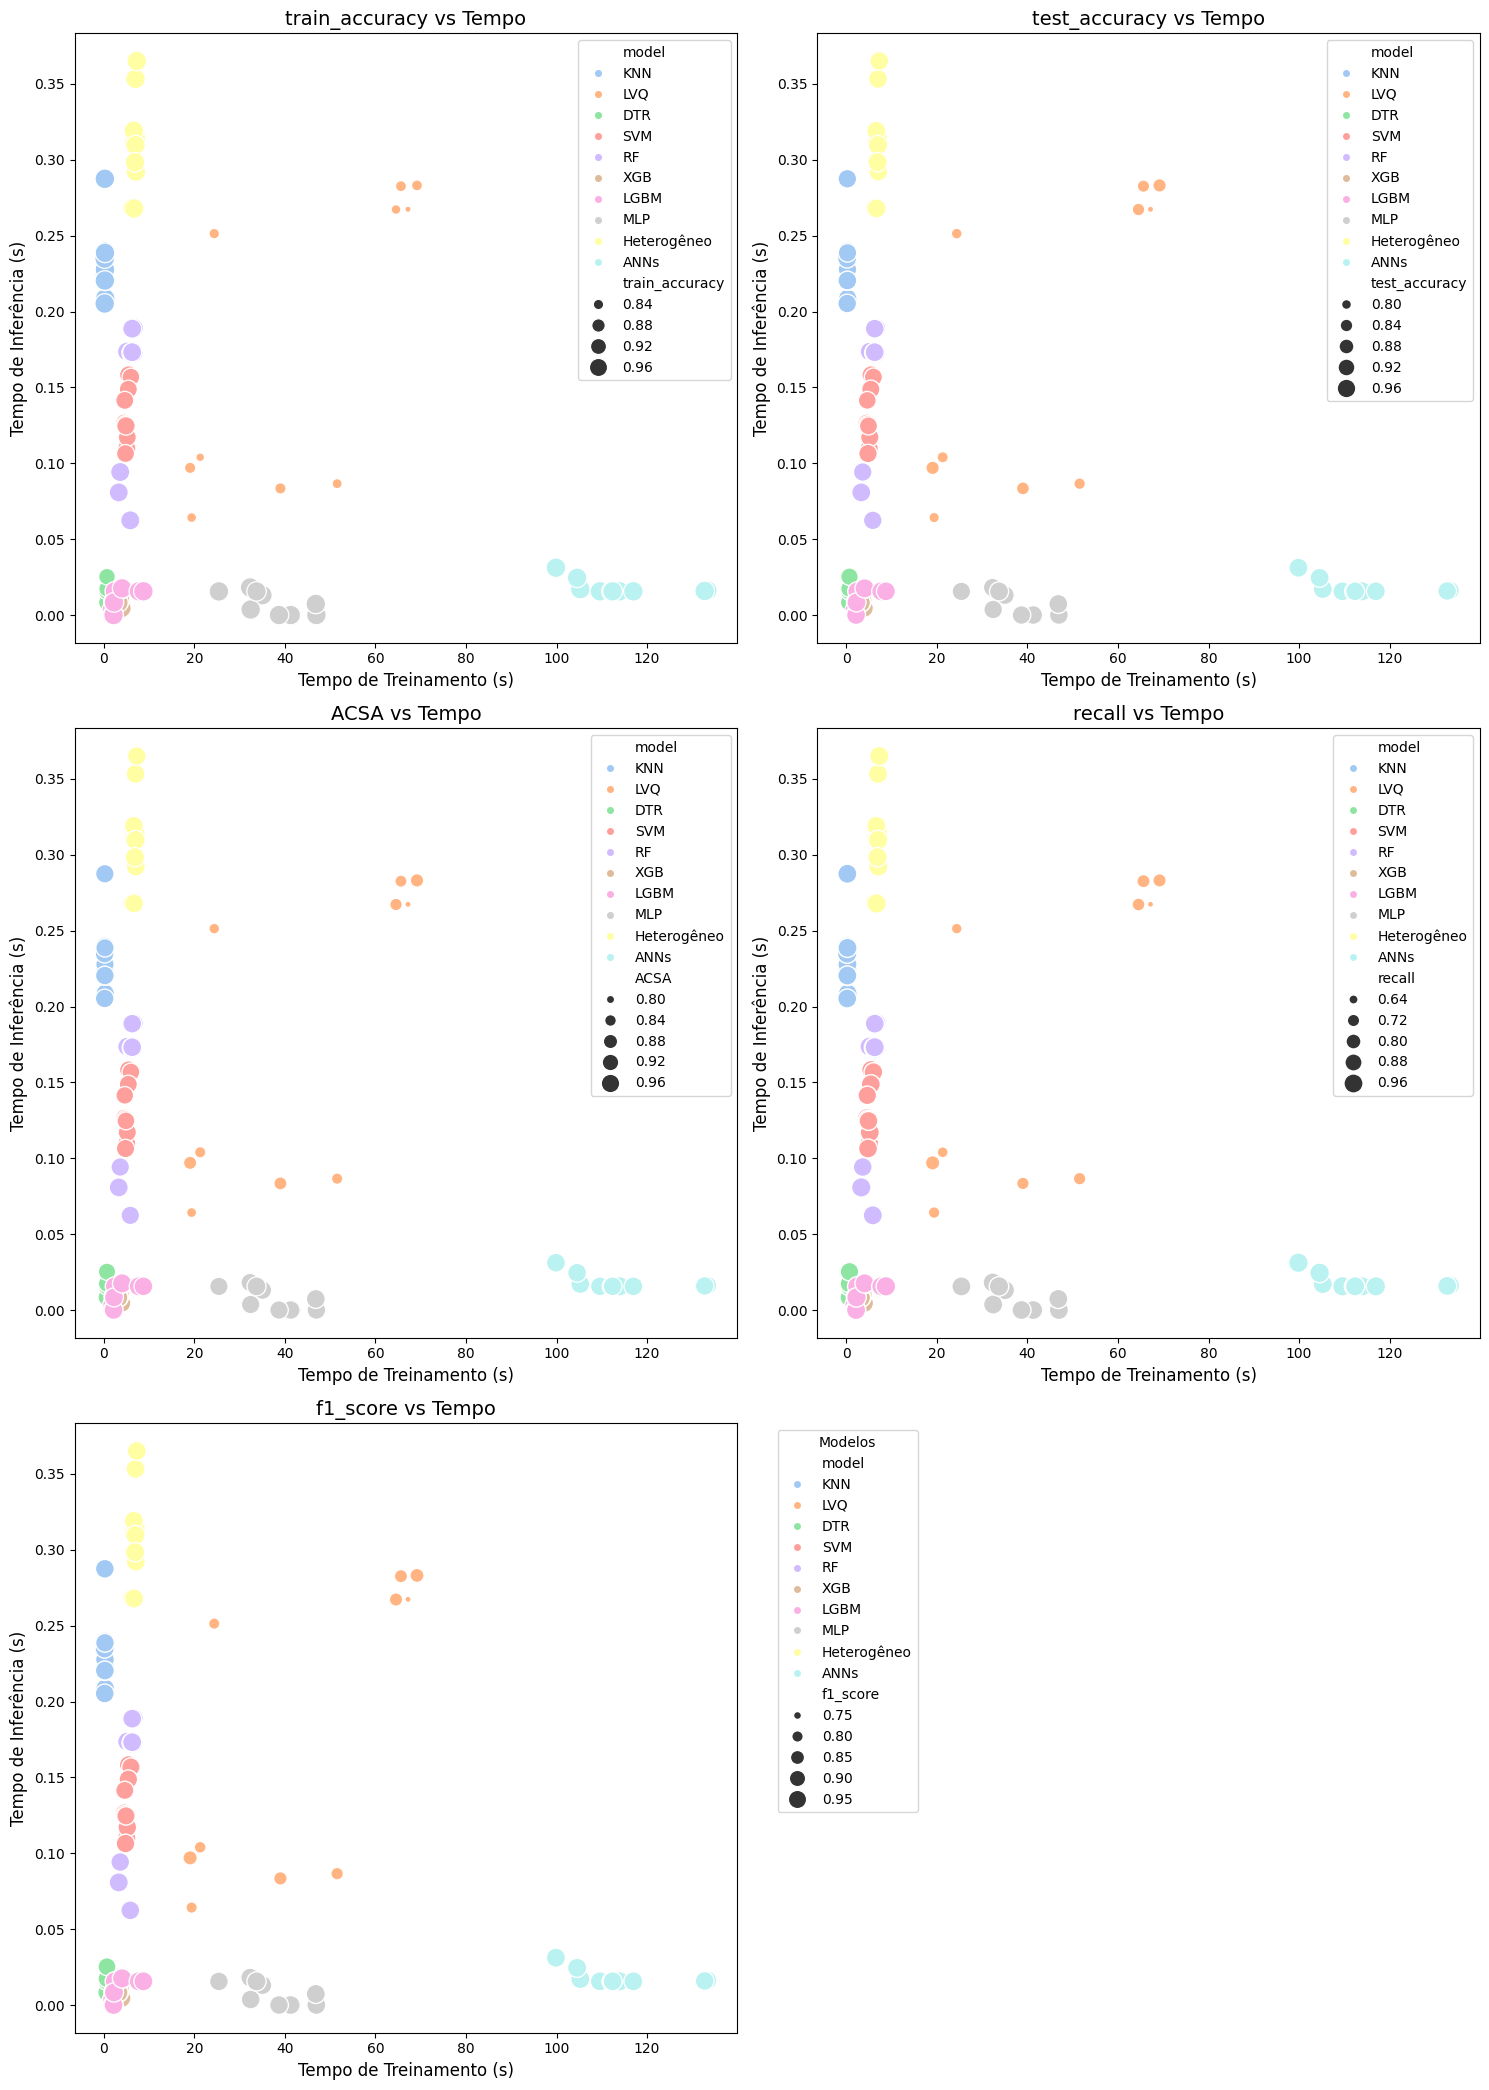

In [27]:
plot_time_vs_performance_scatter(
    list_of_model_results=list_of_model_results,
    list_of_model_names=list_of_model_names,
    list_of_metrics_names=['train_accuracy', 'test_accuracy', 'ACSA', 'recall', 'f1_score']
)